In [1]:
!pip install cartiflette
!pip install geopy pandas cartopy
!pip install geopy

In [6]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [folium]


In [2]:
import pandas as pd

Récupération des données Géod'Air 2022:

In [3]:
geodair_raw = pd.read_csv("data/raw_data/data_air_2022.csv", sep=";")
geodair_raw

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude
0,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,...,51.0,50.614131,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833
1,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,O3,Fond,...,54.0,53.926047,µg-m3,NaN,NaN,NaN,R,1,49.107502,6.122775
2,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,O3,Fond,...,53.0,53.333492,µg-m3,NaN,NaN,NaN,R,1,49.358337,6.156942
3,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01021,Thionville-Garche,Périurbaine,O3,Fond,...,57.0,56.856089,µg-m3,NaN,NaN,NaN,R,1,49.394444,6.201392
4,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02001,Berre l'Etang,Périurbaine,O3,Fond,...,66.0,66.176223,µg-m3,NaN,NaN,NaN,R,1,43.486234,5.171939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO OCCITANIE,FR76ZAG02,ZAG MONTPELLIER,FR50225,Montpellier Liberté,Urbaine,PM2.5,Trafic,...,9.0,9.322676,µg-m3,99.0,54.0,53.0,N,-1,43.611606,3.827868
1137,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR03,ZAR BESANCON,FR82006,Besançon Prévoyance,Urbaine,PM2.5,Fond,...,9.0,8.597722,µg-m3,98.0,100.0,98.0,R,1,47.247400,6.015419
1138,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR01,ZAR BELFORT-MONTBELIARD,FR82010,Montbéliard centre,Urbaine,PM2.5,Fond,...,9.0,8.885362,µg-m3,97.0,100.0,97.0,R,1,47.510307,6.794000
1139,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,PM2.5,Fond,...,7.0,7.268856,µg-m3,99.0,100.0,99.0,R,1,46.671321,5.556620


In [ ]:
geodair_raw.columns

Index(['Date de début', 'Date de fin', 'Organisme', 'code zas', 'Zas',
       'code site', 'nom site', 'type d'implantation', 'Polluant',
       'type d'influence', 'Réglementaire', 'type d'évaluation',
       'type de valeur', 'valeur', 'valeur brute', 'unité de mesure',
       'taux de saisie', 'couverture temporelle', 'couverture de données',
       'code qualité', 'validité', 'Latitude', 'Longitude'],
      dtype='object')

In [37]:
geodair = pd.read_csv("data/processed_data/geodair_2022_villes.csv", sep=",")

Ajout d'une colonne ville :

In [ ]:
from scripts import add_city_columns_insee

add_city_columns_insee.add_city_columns(input_filename = "data_air_2022.csv", output_filename = "geodair_2022_villes_codgeo3.csv")
# ajoute bien les codgeo mais pas les lat et lon...

Metz 57463
Scy-Chazelles 57642
Thionville 57672
Thionville 57672
Berre-l'Étang 13014
Martigues 13056
Istres 13047
Sausset-les-Pins 13104
Arles 13004
Salon-de-Provence 13103
Plan-d'Aups-Sainte-Baume 83093
Aubagne 13005
La Penne-sur-Huveaune 13070
Marseille 13204
Aix-en-Provence 13001
La Valette-du-Var 83144
Brignoles 83023
Hyères 83069
Fréjus 83061
Toulon 83137
Avignon 84007
Apt 84003
Carpentras 84031
Paris 75118
Neuilly-sur-Seine 92051
Cergy 95127
Versailles 78646
Vitry-sur-Seine 94081
Paris 75113
Sonchamp 78601
None None
Les Ulis 91692
Paris 75101
Mantes-la-Jolie 78361
None None
Melun 77288
Lognes 77258
Villemomble 93077
Champigny-sur-Marne 94017
Montgé-en-Goële 77308
Montgeron 91421
Frémainville 95253
Rambouillet 78517
Tremblay-en-France 93073
Beautheil-Saints 77433
Recloses 77386
Saint-Romain-de-Colbosc 76647
Honfleur 14333
Le Havre 76351
Touques 14699
Notre-Dame-de-Bliquetuit 76473
Fécamp 76259
Le Havre 76351
Valenciennes 59606
Douai 59178
Maubeuge 59392
Denain 59172
Cartignies 591

In [13]:
from scripts import add_city_columns_insee
import pandas as pd

input_filename = "data_air_2022.csv"
output_filename = "geodair_2022_villes_codgeo2.csv"

geodair = pd.read_csv("data/raw_data/" + input_filename, sep=";")
geodair

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,valeur,valeur brute,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude
0,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,...,51.0,50.614131,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833
1,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,O3,Fond,...,54.0,53.926047,µg-m3,NaN,NaN,NaN,R,1,49.107502,6.122775
2,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,O3,Fond,...,53.0,53.333492,µg-m3,NaN,NaN,NaN,R,1,49.358337,6.156942
3,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01021,Thionville-Garche,Périurbaine,O3,Fond,...,57.0,56.856089,µg-m3,NaN,NaN,NaN,R,1,49.394444,6.201392
4,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02001,Berre l'Etang,Périurbaine,O3,Fond,...,66.0,66.176223,µg-m3,NaN,NaN,NaN,R,1,43.486234,5.171939
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO OCCITANIE,FR76ZAG02,ZAG MONTPELLIER,FR50225,Montpellier Liberté,Urbaine,PM2.5,Trafic,...,9.0,9.322676,µg-m3,99.0,54.0,53.0,N,-1,43.611606,3.827868
1137,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR03,ZAR BESANCON,FR82006,Besançon Prévoyance,Urbaine,PM2.5,Fond,...,9.0,8.597722,µg-m3,98.0,100.0,98.0,R,1,47.247400,6.015419
1138,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR01,ZAR BELFORT-MONTBELIARD,FR82010,Montbéliard centre,Urbaine,PM2.5,Fond,...,9.0,8.885362,µg-m3,97.0,100.0,97.0,R,1,47.510307,6.794000
1139,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,PM2.5,Fond,...,7.0,7.268856,µg-m3,99.0,100.0,99.0,R,1,46.671321,5.556620


In [14]:
add_city_columns_insee.add_city_codes(geodair)
geodair

Metz 57463
Scy-Chazelles 57642
Thionville 57672
Thionville 57672
Berre-l'Étang 13014
Martigues 13056
Istres 13047
Sausset-les-Pins 13104
Arles 13004
Salon-de-Provence 13103
Plan-d'Aups-Sainte-Baume 83093
Aubagne 13005
La Penne-sur-Huveaune 13070
Marseille 13204
Aix-en-Provence 13001
La Valette-du-Var 83144
Brignoles 83023
Hyères 83069
Fréjus 83061
Toulon 83137
Avignon 84007
Apt 84003
Carpentras 84031
Paris 75118
Neuilly-sur-Seine 92051
Cergy 95127
Versailles 78646
Vitry-sur-Seine 94081
Paris 75113
Sonchamp 78601
None None
Les Ulis 91692
Paris 75101
Mantes-la-Jolie 78361
None None
Melun 77288
Lognes 77258
Villemomble 93077
Champigny-sur-Marne 94017
Montgé-en-Goële 77308
Montgeron 91421
Frémainville 95253
Rambouillet 78517
Tremblay-en-France 93073
Beautheil-Saints 77433
Recloses 77386
Saint-Romain-de-Colbosc 76647
Honfleur 14333
Le Havre 76351
Touques 14699
Notre-Dame-de-Bliquetuit 76473
Fécamp 76259
Le Havre 76351
Valenciennes 59606
Douai 59178
Maubeuge 59392
Denain 59172
Cartignies 591

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Ville,CODGEO
0,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833,Metz,57463
1,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,49.107502,6.122775,Scy-Chazelles,57642
2,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,49.358337,6.156942,Thionville,57672
3,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01021,Thionville-Garche,Périurbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,49.394444,6.201392,Thionville,57672
4,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02001,Berre l'Etang,Périurbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,43.486234,5.171939,Berre-l'Étang,13014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO OCCITANIE,FR76ZAG02,ZAG MONTPELLIER,FR50225,Montpellier Liberté,Urbaine,PM2.5,Trafic,...,µg-m3,99.0,54.0,53.0,N,-1,43.611606,3.827868,Montpellier,34172
1137,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR03,ZAR BESANCON,FR82006,Besançon Prévoyance,Urbaine,PM2.5,Fond,...,µg-m3,98.0,100.0,98.0,R,1,47.247400,6.015419,Besançon,25056
1138,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR01,ZAR BELFORT-MONTBELIARD,FR82010,Montbéliard centre,Urbaine,PM2.5,Fond,...,µg-m3,97.0,100.0,97.0,R,1,47.510307,6.794000,Montbéliard,25388
1139,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,PM2.5,Fond,...,µg-m3,99.0,100.0,99.0,R,1,46.671321,5.556620,Lons-le-Saunier,39300


In [15]:
geodair2 = geodair.copy()

communes = pd.read_csv("data/raw_data/20230823-communes-departement-region.csv")

communes = communes[["code_commune_INSEE", "latitude", "longitude"]].rename(columns={
    "code_commune_INSEE": "CODGEO",
    "latitude": "Latitude_commune",
    "longitude": "Longitude_commune"
})

geodair = geodair.merge(
    communes,
    on="CODGEO",
    how="left"
)

geodair2

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Ville,CODGEO
0,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,49.119442,6.180833,Metz,57463
1,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,49.107502,6.122775,Scy-Chazelles,57642
2,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,49.358337,6.156942,Thionville,57672
3,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01021,Thionville-Garche,Périurbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,49.394444,6.201392,Thionville,57672
4,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO SUD,FR93ZAG01,ZAG MARSEILLE-AIX,FR02001,Berre l'Etang,Périurbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,43.486234,5.171939,Berre-l'Étang,13014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1136,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO OCCITANIE,FR76ZAG02,ZAG MONTPELLIER,FR50225,Montpellier Liberté,Urbaine,PM2.5,Trafic,...,µg-m3,99.0,54.0,53.0,N,-1,43.611606,3.827868,Montpellier,34172
1137,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR03,ZAR BESANCON,FR82006,Besançon Prévoyance,Urbaine,PM2.5,Fond,...,µg-m3,98.0,100.0,98.0,R,1,47.247400,6.015419,Besançon,25056
1138,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR01,ZAR BELFORT-MONTBELIARD,FR82010,Montbéliard centre,Urbaine,PM2.5,Fond,...,µg-m3,97.0,100.0,97.0,R,1,47.510307,6.794000,Montbéliard,25388
1139,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,PM2.5,Fond,...,µg-m3,99.0,100.0,99.0,R,1,46.671321,5.556620,Lons-le-Saunier,39300


In [16]:
geodair

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Ville,CODGEO,Latitude_commune,Longitude_commune
0,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,...,NaN,NaN,R,1,49.119442,6.180833,Metz,57463,49.108113,6.195525
1,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,...,NaN,NaN,R,1,49.119442,6.180833,Metz,57463,49.108113,6.195525
2,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01011,Metz-Centre,Urbaine,O3,Fond,...,NaN,NaN,R,1,49.119442,6.180833,Metz,57463,49.108113,6.195525
3,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01018,Scy-Chazelles,Périurbaine,O3,Fond,...,NaN,NaN,R,1,49.107502,6.122775,Scy-Chazelles,57642,49.114042,6.119849
4,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZAG02,ZAG METZ,FR01020,Thionville-Centre,Urbaine,O3,Fond,...,NaN,NaN,R,1,49.358337,6.156942,Thionville,57672,49.375972,6.129283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR03,ZAR BESANCON,FR82006,Besançon Prévoyance,Urbaine,PM2.5,Fond,...,100.0,98.0,R,1,47.247400,6.015419,Besançon,25056,47.255387,6.019487
2045,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZAR01,ZAR BELFORT-MONTBELIARD,FR82010,Montbéliard centre,Urbaine,PM2.5,Fond,...,100.0,97.0,R,1,47.510307,6.794000,Montbéliard,25388,47.515517,6.791481
2046,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82050,Lons-le-Saunier CV,Urbaine,PM2.5,Fond,...,100.0,99.0,R,1,46.671321,5.556620,Lons-le-Saunier,39300,46.674480,5.557332
2047,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO BOURGOGNE-FRANCHE-COMTE,FR27ZRE01,ZR BOURGOGNE-FRANCHE-COMTE,FR82070,Baume-les-Dames,Urbaine,PM2.5,Trafic,...,100.0,97.0,R,1,47.351288,6.359722,Baume-les-Dames,25047,47.354440,6.343454


In [17]:
geodair.to_csv("data/processed_data/" + output_filename, index=False)

In [ ]:
from geopy.geocoders import Nominatim
import time

geolocator = Nominatim(user_agent="geoapi", timeout = 10)

n, _ = geodair.shape
coords = []

for i in range(n):
    lat = geodair.loc[i, "Latitude"]
    lon = geodair.loc[i, "Longitude"]
    coords.append((lat, lon))


cities = []
codgeo = []
possible_fields = ['city', 'town', 'village', 'municipality', 'hamlet']

for i in range(n):
    lat, lon = coords[i]
    location = geolocator.reverse((lat, lon), exactly_one=True)
    address = location.raw['address']

    city = None
    for field in possible_fields:
        if field in address:
            city = address[field]
            break

    cities.append(city)
    code_insee = address.get('citycode')
    codgeo.append(code_insee)
    print(city + " " + code_insee)
    time.sleep(1)

print(cities)

n_none = 0
n = len(cities)
for i in range(n_none):
    if cities[i] == None:
        n_none += 1

print(n_none)

pd_cities = pd.Series(cities)
geodair["Ville"] = pd_cities
geodair.to_csv('data/processed_data/geodair_2022_villes.csv', index=False)


Metz
Scy-Chazelles
Thionville
Thionville
Berre-l'Étang
Martigues
Istres
Sausset-les-Pins
Arles
Salon-de-Provence
Plan-d'Aups-Sainte-Baume
Aubagne
La Penne-sur-Huveaune
Marseille
Aix-en-Provence
La Garde
Brignoles
Hyères
Saint-Raphaël
Toulon
Avignon
Apt
Carpentras
Paris
Neuilly-sur-Seine
Cergy
Versailles
Vitry-sur-Seine
Paris
Sonchamp
Saint-Martin-du-Tertre
Les Ulis
Paris
Mantes-la-Jolie
Bois-Herpin
Melun
Lognes
Villemomble
Champigny-sur-Marne
Montgé-en-Goële
Montgeron
Frémainville
Rambouillet
Tremblay-en-France
Beautheil-Saints
Fontainebleau
Saint-Romain-de-Colbosc
Honfleur
Le Havre
Touques
Notre-Dame-de-Bliquetuit
Fécamp
Le Havre
Valenciennes
Douai
Maubeuge
Denain
Cartignies
Saint-Amand-les-Eaux
Clermont-Ferrand
Clermont-Ferrand
Paray-le-Frésil
Rageade
Aurillac
Le Puy-en-Velay
Fay-sur-Lignon
Yzeure
Montluçon
Vichy
Royat
Riom
Montpellier
Lattes
Saint-Gély-du-Fesc
Agde
Corneilhan
Saze
Nîmes
La Calmette
Saint-Estève
Perpignan
La Rochelle
Aytré
Poitiers
Angoulême
Villiers-en-Bois
Niort
Ai

IndexError: list index out of range

Ajout d'une colonne "Latitude ville" et d'une colonne "Longitude ville"

In [ ]:
from geopy.geocoders import Nominatim
import pandas as pd
import time

geolocator = Nominatim(user_agent="geodair")

def geocode_city(city):
    try:
        loc = geolocator.geocode(city + ", France")
        if loc:
            return pd.Series([loc.latitude, loc.longitude])
    except:
        pass
    return pd.Series([None, None])

geodair[["Latitude ville", "Longitude ville"]] = geodair["Ville"].apply(geocode_city)

time.sleep(1)  # utilité ???

geodair.to_csv('data/processed_data/geodair_2022_villes_coords.csv', index=False)


On se restreint à la métropole pour une meilleure visualisation :

In [3]:
import pandas as pd

geodair = pd.read_csv("data/processed_data/geodair_2022_villes_codgeo2.csv", sep=",")

In [4]:
lat_min, lat_max = 41.0, 51.5
lon_min, lon_max = -5.5, 9.5

geodair_metro = geodair[
    (geodair["Latitude"].between(lat_min, lat_max)) &
    (geodair["Longitude"].between(lon_min, lon_max))
]

Carte des stations :

In [10]:
!pip install geopandas shapely

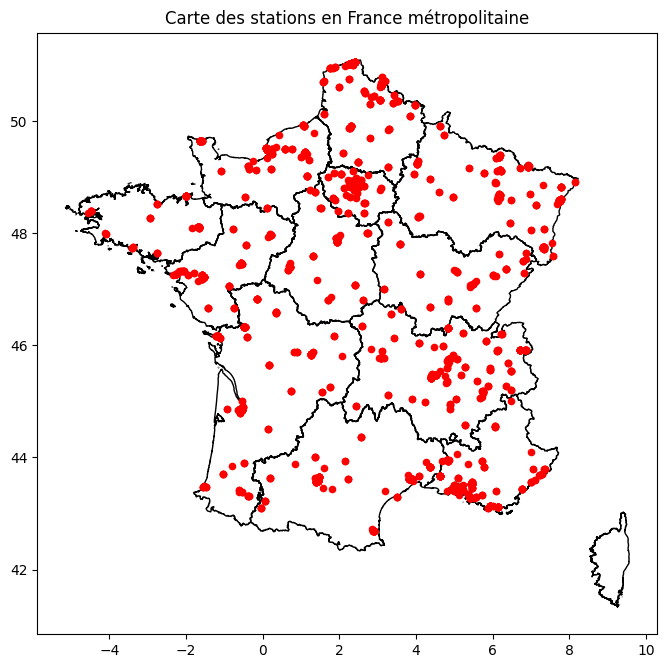

In [5]:
import geopandas as gpd
from cartiflette import carti_download
import matplotlib.pyplot as plt

france = carti_download(
      values = ["France"],
      crs = 4326,
      borders = "REGION",
      vectorfile_format="geojson",
      simplification=50,
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
france = france.loc[france['INSEE_REG']>10]

geodair_gdf = gpd.GeoDataFrame(
    geodair_metro,
    geometry=gpd.points_from_xy(geodair_metro["Longitude"], geodair_metro["Latitude"]),
    crs="EPSG:4326"
)

ax = france.plot(figsize=(8,8), edgecolor="black", facecolor="none")
geodair_gdf.plot(ax=ax, color="red", markersize=20)

plt.title("Carte des stations en France métropolitaine")
plt.show()



Carte des villes où se trouvent des stations

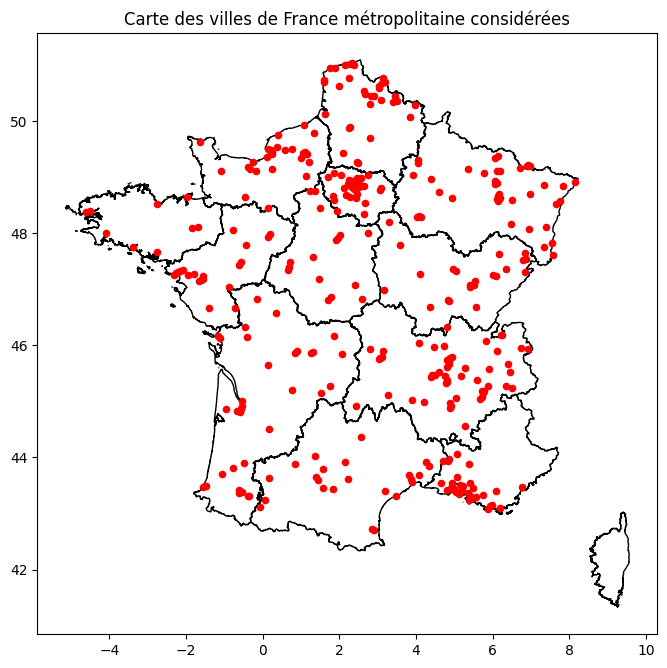

In [6]:
import geopandas as gpd
from cartiflette import carti_download
import matplotlib.pyplot as plt

france = carti_download(
      values = ["France"],
      crs = 4326,
      borders = "REGION",
      vectorfile_format="geojson",
      simplification=50,
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
france = france.loc[france['INSEE_REG']>10]

geodair_metro_villes = geodair_metro[['Ville', 'Latitude_commune', 'Longitude_commune']].drop_duplicates()

geodair_gdf = gpd.GeoDataFrame(
    geodair_metro_villes,
    geometry=gpd.points_from_xy(geodair_metro_villes["Longitude_commune"], geodair_metro_villes["Latitude_commune"]),
    crs="EPSG:4326"
)

ax = france.plot(figsize=(8,8), edgecolor="black", facecolor="none")
geodair_gdf.plot(ax=ax, color="red", markersize=20)

plt.title("Carte des villes de France métropolitaine considérées")
plt.show()

Il y a 25 lignes qui n'ont pas de CODGEO (l'API INSEE n'a pas su le trouver avec lat et lon), ce qui veut sans doute dire que ces stations sont trop éloignées des villes. On supprime ces 25 lignes du dataframe

In [ ]:
geodair_metro.loc[(geodair["CODGEO"].isna()),:]

,Date de début,Date de fin,Organisme,code zas,Zas,code site,nom site,type d'implantation,Polluant,type d'influence,...,unité de mesure,taux de saisie,couverture temporelle,couverture de données,code qualité,validité,Latitude,Longitude,Ville,CODGEO
30,2022/01/01 00:00:00,2022/12/31 23:59:59,AIRPARIF,FR11ZRE01,ZR ILE-DE-FRANCE,FR04048,Zone Rurale Nord,Rurale régionale,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,49.100277,2.343889,NaN,NaN
34,2022/01/01 00:00:00,2022/12/31 23:59:59,AIRPARIF,FR11ZRE01,ZR ILE-DE-FRANCE,FR04066,Zone rurale Sud,Rurale régionale,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,48.364166,2.236944,NaN,NaN
110,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR14008,REVIN,Rurale nationale,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,49.907780,4.630000,NaN,NaN
121,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO AUVERGNE-RHÔNE-ALPES,FR93ZRE02,ZR PROVENCE-ALPES-COTE-D-AZUR,FR15031,Le Casset2,Rurale nationale,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,44.997000,6.469400,NaN,NaN
133,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR16302,Donon Vosges Moyennes 2,Rurale nationale,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,48.492992,7.129800,NaN,NaN
146,2022/01/01 00:00:00,2022/12/31 23:59:59,AIR BREIZH,FR53ZRE01,ZR BRETAGNE,FR19020,Kergoff,Rurale nationale,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,48.261963,-2.943631,NaN,NaN
157,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO AUVERGNE-RHÔNE-ALPES,FR84ZAG01,ZAG LYON,FR20048,SAINT EXUPERY,Périurbaine,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,45.753300,5.072200,NaN,NaN
191,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO SUD,FR93ZRE02,ZR PROVENCE-ALPES-COTE-D-AZUR,FR24039,Obs Haute-Provence,Rurale près des villes,O3,Fond,...,µg-m3,NaN,NaN,NaN,R,1,43.933476,5.711809,NaN,NaN
406,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR14008,REVIN,Rurale nationale,NOX as NO2,Fond,...,µg-m3,94.0,100.0,94.0,R,1,49.907780,4.630000,NaN,NaN
428,2022/01/01 00:00:00,2022/12/31 23:59:59,ATMO GRAND EST,FR44ZRE01,ZR GRAND-EST,FR16302,Donon Vosges Moyennes 2,Rurale nationale,NOX as NO2,Fond,...,µg-m3,98.0,100.0,98.0,R,1,48.492992,7.129800,NaN,NaN


In [7]:
geodair_metro = geodair_metro.dropna(subset=["CODGEO"])

In [8]:
print(geodair_metro["CODGEO"].isna().sum())

0


On fait maintenant des cartes par polluant

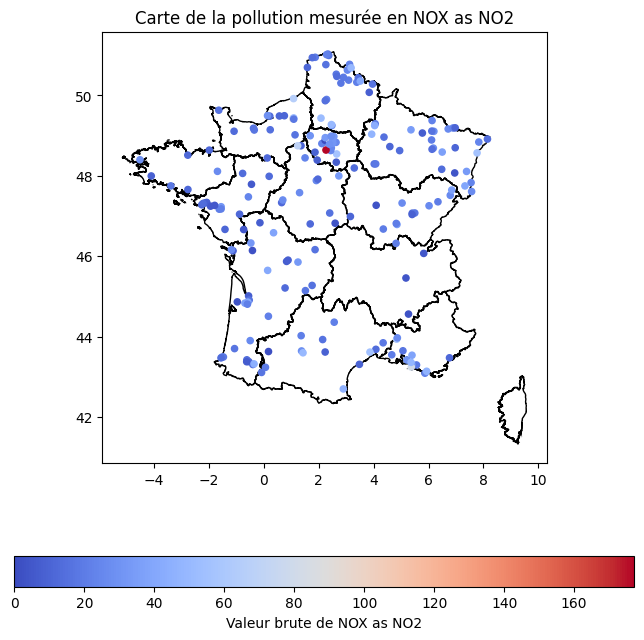

In [ ]:
geodair_NOX = geodair_metro.loc[geodair_metro["Polluant"] == "NOX as NO2", :].groupby(["CODGEO", "Latitude_commune", "Longitude_commune"]).agg({"valeur brute": "mean"}).reset_index()

france = carti_download(
      values = ["France"],
      crs = 4326,
      borders = "REGION",
      vectorfile_format="geojson",
      simplification=50,
      filter_by="FRANCE_ENTIERE",
      source="EXPRESS-COG-CARTO-TERRITOIRE",
      year=2022)
france = france.loc[france['INSEE_REG']>10]

geodair_gdf = gpd.GeoDataFrame(
    geodair_NOX,
    geometry=gpd.points_from_xy(geodair_NOX["Longitude_commune"], geodair_NOX["Latitude_commune"]),
    crs="EPSG:4326"
)


fig, ax = plt.subplots(figsize=(8, 8))
france.plot(ax=ax, edgecolor="black", facecolor="none")

# Tracé des points avec une couleur dépendant de "valeur brute"
geodair_gdf.plot(
    ax=ax,
    column="valeur brute",  # Colonne utilisée pour la couleur
    cmap="coolwarm",         # Dégradé de couleurs (tu peux choisir : "plasma", "magma", "coolwarm", etc.)
    markersize=20,
    legend=True,            # Affiche la légende
    legend_kwds={"label": "Valeur brute de NOX as NO2", "orientation": "horizontal"}
)


plt.title("Carte de la pollution mesurée en NOX as NO2")
plt.show()

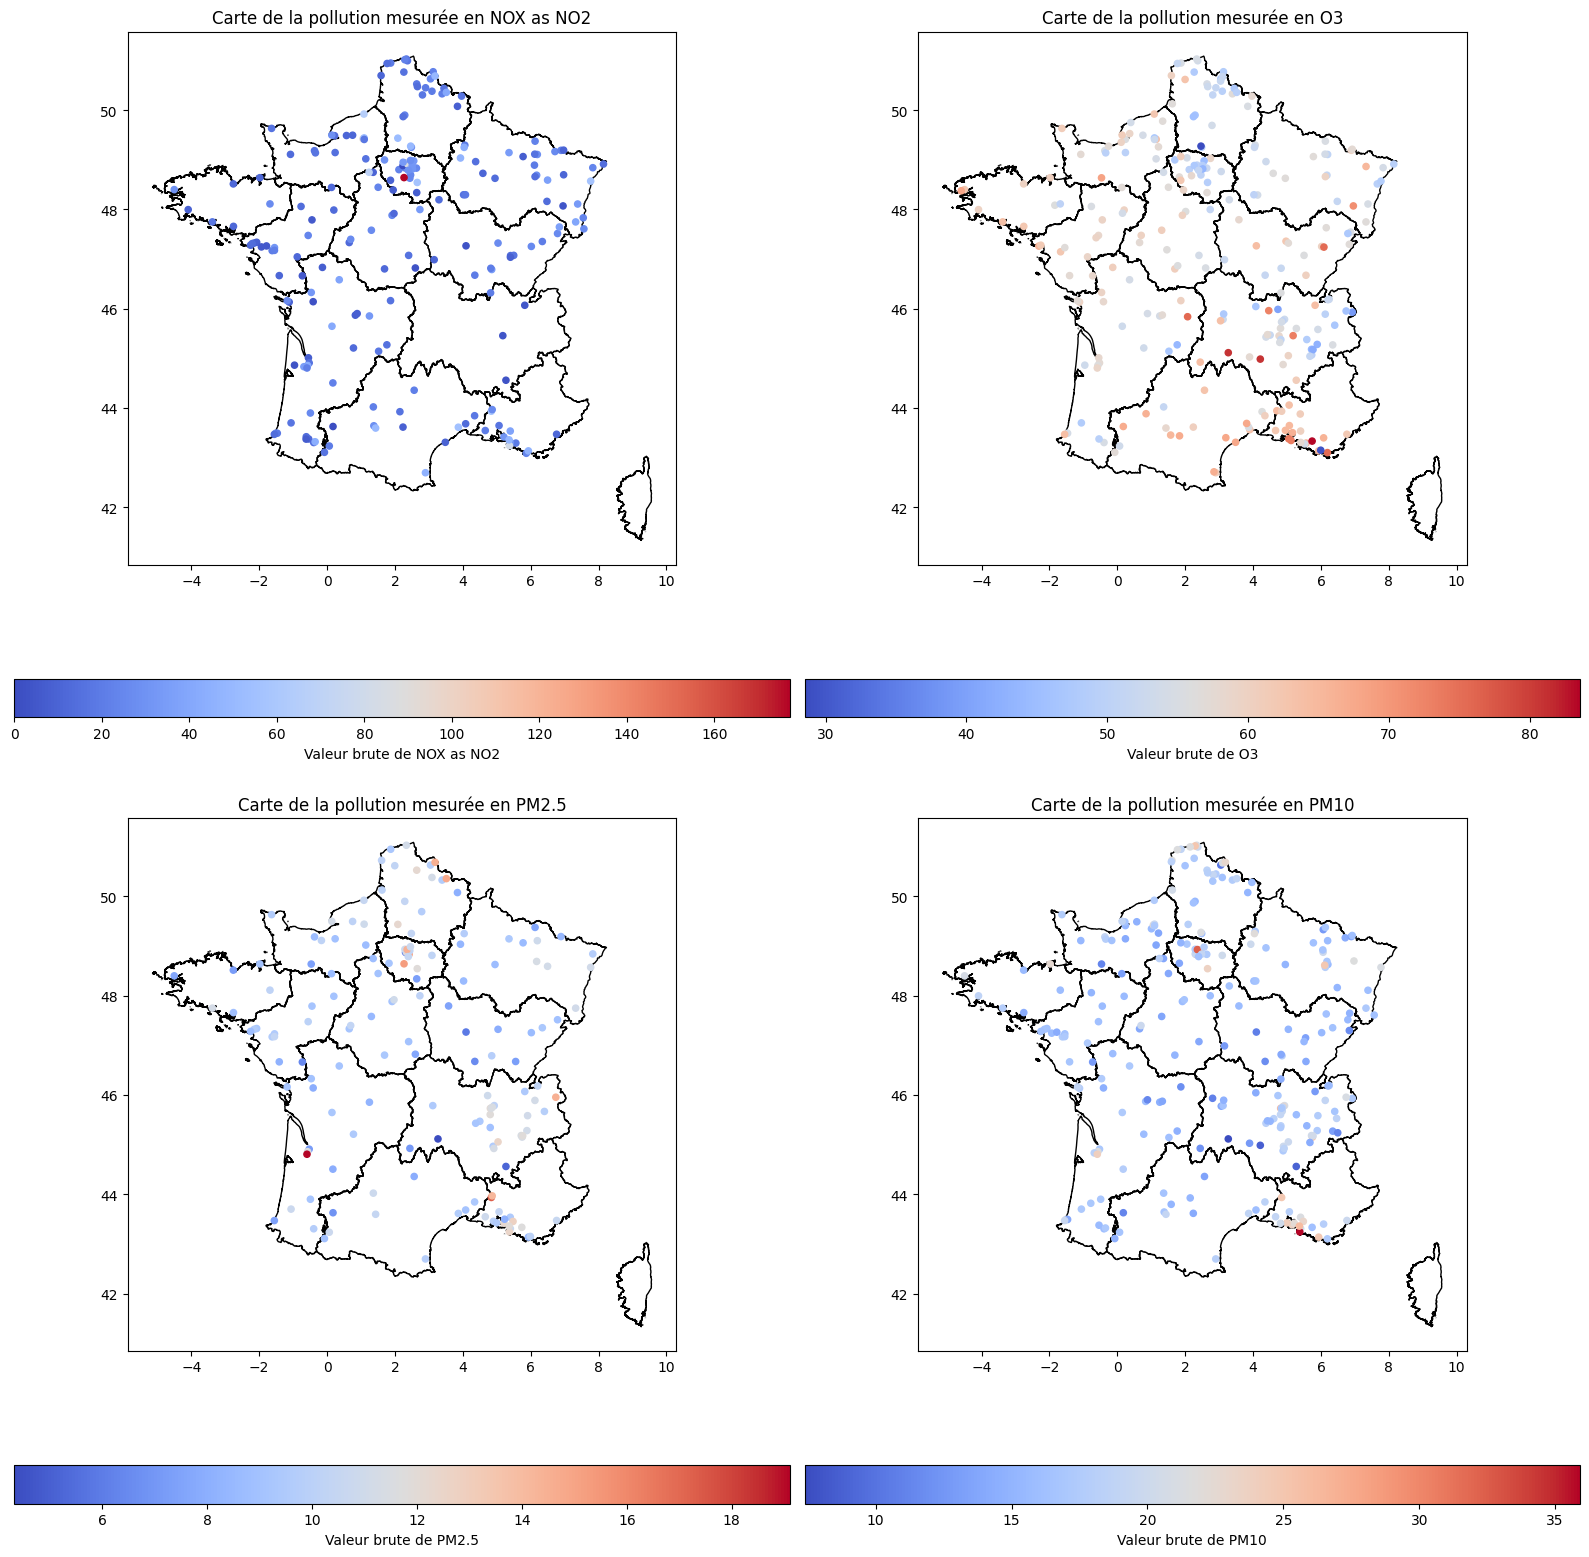

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Liste des polluants à cartographier
polluants = ["NOX as NO2", "O3", "PM2.5", "PM10"]

# Téléchargement des frontières de la France (une seule fois)
france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)
france = france.loc[france['INSEE_REG'] > 10]

# Création d'une figure avec 4 sous-graphiques (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()  # Pour itérer facilement

# Boucle sur chaque polluant
for i, polluant in enumerate(polluants):
    # Filtrage et agrégation pour le polluant actuel
    geodair_polluant = (
        geodair_metro.loc[geodair_metro["Polluant"] == polluant, :]
        .groupby(["CODGEO", "Latitude_commune", "Longitude_commune"])
        .agg({"valeur brute": "mean"})
        .reset_index()
    )

    # Création du GeoDataFrame pour les points
    geodair_gdf = gpd.GeoDataFrame(
        geodair_polluant,
        geometry=gpd.points_from_xy(geodair_polluant["Longitude_commune"], geodair_polluant["Latitude_commune"]),
        crs="EPSG:4326"
    )

    # Tracé des frontières de la France
    france.plot(ax=axes[i], edgecolor="black", facecolor="none")

    # Tracé des points avec une couleur dépendant de "valeur brute"
    geodair_gdf.plot(
        ax=axes[i],
        column="valeur brute",
        cmap="coolwarm",
        markersize=20,
        legend=True,
        legend_kwds={"label": f"Valeur brute de {polluant}", "orientation": "horizontal"}
    )

    # Titre du sous-graphe
    axes[i].set_title(f"Carte de la pollution mesurée en {polluant}")

# Ajustement de l'espacement entre les sous-graphiques
plt.tight_layout()
plt.show()


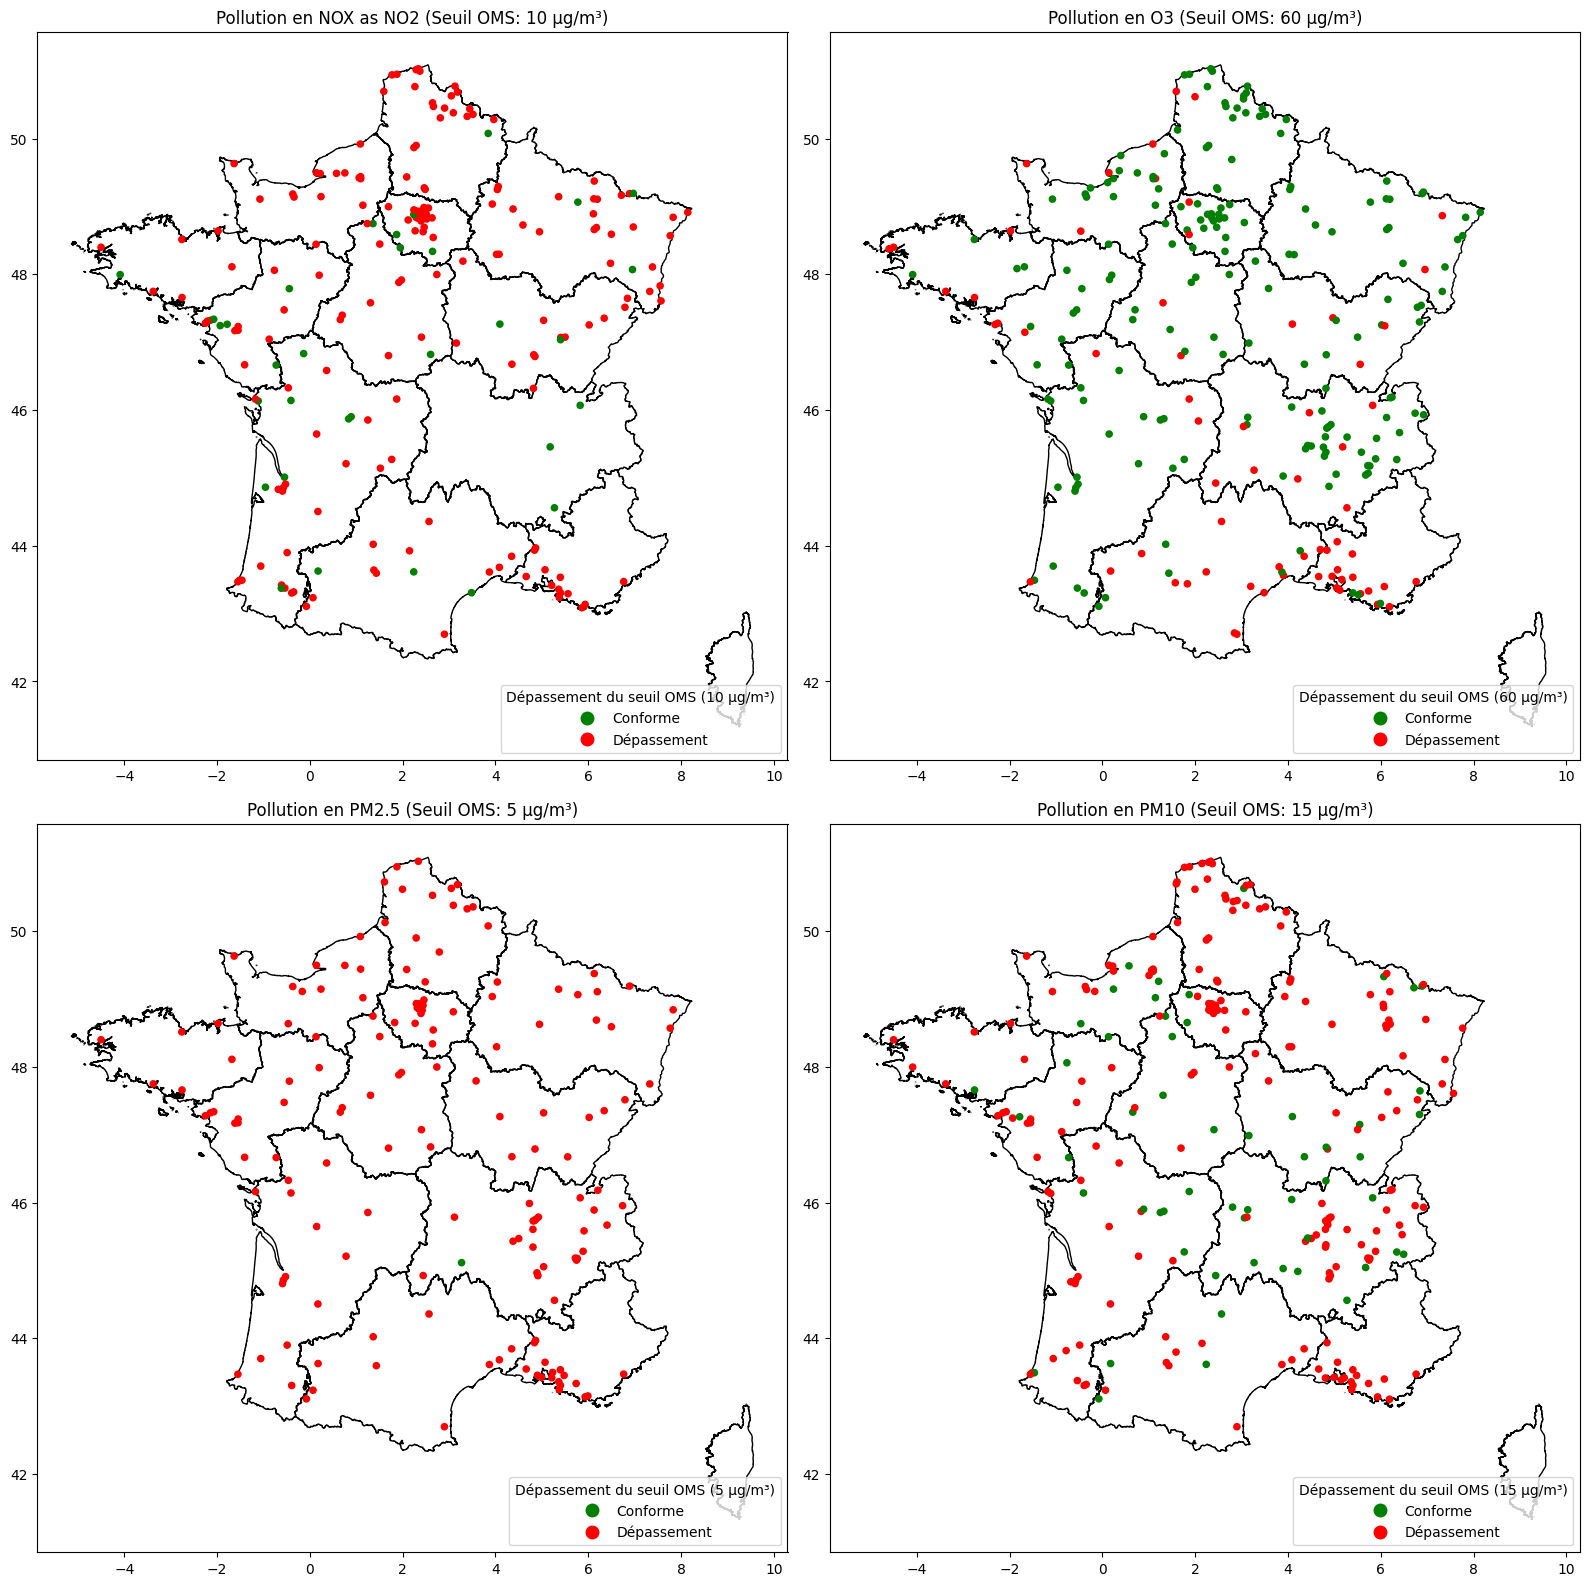

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Seils OMS pour chaque polluant
seuil_OMS = {"NOX as NO2": 10, "O3": 60, "PM2.5": 5, "PM10": 15}
polluants = ["NOX as NO2", "O3", "PM2.5", "PM10"]

# Téléchargement des frontières de la France
france = carti_download(
    values=["France"],
    crs=4326,
    borders="REGION",
    vectorfile_format="geojson",
    simplification=50,
    filter_by="FRANCE_ENTIERE",
    source="EXPRESS-COG-CARTO-TERRITOIRE",
    year=2022
)
france = france.loc[france['INSEE_REG'] > 10]

# Création d'une figure avec 4 sous-graphiques (2x2)
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()

# Palette de couleurs discrète (rouge = dépassement, vert = conforme)
cmap = mcolors.ListedColormap(['green', 'red'])
norm = mcolors.BoundaryNorm([0, 0.5, 1], 2)  # 0->vert, 1->rouge

# Boucle sur chaque polluant
for i, polluant in enumerate(polluants):
    # Filtrage et agrégation
    geodair_polluant = (
        geodair_metro.loc[geodair_metro["Polluant"] == polluant, :]
        .groupby(["CODGEO", "Latitude_commune", "Longitude_commune"])
        .agg({"valeur brute": "mean"})
        .reset_index()
    )
    # Ajout d'une colonne binaire pour le seuil
    geodair_polluant["dépassement"] = geodair_polluant["valeur brute"] >= seuil_OMS[polluant]

    # Création du GeoDataFrame
    geodair_gdf = gpd.GeoDataFrame(
        geodair_polluant,
        geometry=gpd.points_from_xy(geodair_polluant["Longitude_commune"], geodair_polluant["Latitude_commune"]),
        crs="EPSG:4326"
    )

    # Tracé des frontières
    france.plot(ax=axes[i], edgecolor="black", facecolor="none")

    # Tracé des points avec couleur selon le seuil
    geodair_gdf.plot(
        ax=axes[i],
        column="dépassement",
        cmap=cmap,
        norm=norm,
        markersize=20,
        legend=True,
        legend_kwds={
            "loc": "lower right",
            "title": f"Dépassement du seuil OMS ({seuil_OMS[polluant]} \u03BCg/m³)",
            "labels": ["Conforme", "Dépassement"]
        }
    )

    # Titre
    axes[i].set_title(f"Pollution en {polluant} (Seuil OMS: {seuil_OMS[polluant]} \u03BCg/m³)")

plt.tight_layout()
plt.show()


